In [1]:
import numpy as np
from tqdm import tqdm
import numpy as np
compare_frame_dict = np.load('70_hedge_back.npy', allow_pickle=True).item()
frame_bt_0 = np.load('70_hedge_back_frame_bt_0.npy')

In [2]:
for i in compare_frame_dict:
    compare_mean_dict = compare_frame_dict[i]['compare_mean_dict']
    euclidean_dis = compare_frame_dict[i]['euclidean_dis']
    
    for key in tqdm(compare_mean_dict, ncols=70):
        compare_mean_dict[key] = np.mean(compare_mean_dict[key], axis=0)
        compare_mean_dict[key] = np.sqrt(np.sum(np.power(compare_mean_dict[key], 2)/2))

100%|██████████████████████| 398701/398701 [00:11<00:00, 35847.96it/s]


In [3]:
for i in tqdm(compare_frame_dict):
    compare_mean_dict = compare_frame_dict[i]['compare_mean_dict']
    euclidean_dis = compare_frame_dict[i]['euclidean_dis']

    back_compare_mean_dict = {k: v for k, v in sorted(compare_mean_dict.items(), key=lambda item: item[1]) if v <= euclidean_dis * 1.5}
    hedge_compare_mean_dict = {k: v for k, v in sorted(compare_mean_dict.items(), key=lambda item: item[1]) if v > euclidean_dis}
    compare_frame_dict[i]['back'] = back_compare_mean_dict
    compare_frame_dict[i]['hedge'] = hedge_compare_mean_dict

100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


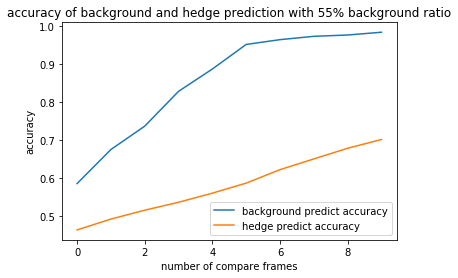

In [4]:
back_compare_mean_dict = {}
hedge_compare_mean_dict = {}
back_acc_list = []
back_count_list = []
hedge_acc_list = []
hedge_count_list = []
for i in compare_frame_dict:
    if len(back_compare_mean_dict):
        back_compare_mean_dict = {k:v for k, v in back_compare_mean_dict.items() if k in compare_frame_dict[i]['back']}
    else:
        back_compare_mean_dict = compare_frame_dict[i]['back']
        
    if len(hedge_compare_mean_dict):
        hedge_compare_mean_dict = {k:v for k, v in hedge_compare_mean_dict.items() if k in compare_frame_dict[i]['hedge']}
    else:
        hedge_compare_mean_dict = compare_frame_dict[i]['hedge']
    
    back_accurate_list = []
    for i, j in back_compare_mean_dict:
        if sum(frame_bt_0[i][j])==3:
            back_accurate_list.append(1)
        else:
            back_accurate_list.append(0)
#     print('back_accuracy', sum(back_accurate_list)/len(back_accurate_list), len(back_accurate_list))
    back_acc_list.append(sum(back_accurate_list)/len(back_accurate_list))
    back_count_list.append(len(back_accurate_list))
    hedge_accurate_list = []
    for i, j in hedge_compare_mean_dict:
        if sum(frame_bt_0[i][j]) == 0:
            hedge_accurate_list.append(1)
        else:
            hedge_accurate_list.append(0)
    hedge_acc_list.append(sum(hedge_accurate_list)/len(hedge_accurate_list))
    hedge_count_list.append(len(hedge_accurate_list))
#     print('hedge_accuracy', sum(hedge_accurate_list)/len(hedge_accurate_list), len(hedge_accurate_list))
import matplotlib.pyplot as plt
plt.plot(back_acc_list)
plt.plot(hedge_acc_list)
plt.title('accuracy of background and hedge prediction with 55% background ratio')
plt.legend(['background predict accuracy', 'hedge predict accuracy'])
plt.ylabel('accuracy')
plt.xlabel('number of compare frames')
plt.show()